<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

You work for a school district that has asked you to advise their high school students on what SAT or ACT score they should be aiming for based on their intended area of study or school preferences.


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major

* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

When I first submitted this project, I totally missed this point!
On looking now, I've found that many top schools will still reject students with perfect SAT scores if the other parts of their application are lacking or dull. (https://www.huffpost.com/entry/why-a-perfect-sat-score-c_1_b_9219184)
Meanwhile, some schools (in particular public schools) will guarentee admittance if your score is meets a certain threshold, which varies from school to school. (https://blog.prepscholar.com/colleges-with-guaranteed-admission-based-on-sat-and-act-scores)
With these points in mind, I think it's best to assume that a better SAT score is a net positive.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [67]:
# Code:
list = [5, 7, 1, 10, 22]
def mean_finder(span):
    return sum(span) / len(span)
mean_finder(list)

9.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [68]:
# Code:
def st_dev_finder(numbers):
    sum = 0
    for xi in numbers:
        sum += (xi - mean_finder(numbers)) ** 2
    return (sum / len(numbers)) ** .5
st_dev_finder(list)

7.127411872482185

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [69]:
# Code:
def percentage_cleaner(input):
    if '%' in input:
        return float(input.strip('%'))/100
percentage_cleaner('55%')

0.55

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [70]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [71]:
#import dfs and get looks at them
intended_major_df = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')
score_by_school_df = pd.read_csv('../data/sat_act_by_college.csv')
score_by_school_df.tail(5)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
411,University of Texas Rio Grande Valley,No,NaN,University of Texas Rio Grande Valley requires...,10680,79.8%,950-1130,17-22
412,University of South Dakota,No,NaN,Unviersity of South Dakota requires either the...,4434,86.4%,990-1180,19-25
413,University of Mississippi,No,NaN,Ole Miss requires either the SAT or ACT. It do...,15371,88.1%,1050-1270,21-29
414,University of Wyoming,No,NaN,University of Wyoming requires either the SAT ...,5348,96.0%,1060-1280,22-28
415,University of Texas El Paso,No,NaN,UTEP requires either the SAT or ACT. It does n...,7157,99.9%,820-1050,17-23


In [72]:
intended_major_df.head(5)

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


## Data Cleaning begins!

In [73]:
#checks for null columns
intended_major_df[intended_major_df.isna().any(axis=1)]

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math


In [74]:
score_by_school_df = score_by_school_df.dropna()

In [75]:
intended_major_df = intended_major_df.dropna()

In [76]:
score_by_school_df[score_by_school_df.isna().any(axis=1)]

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile


^ no more nulls!

## Checking Types and fixing them up to numbers.

In [77]:

score_by_school_df.dtypes

School                            object
Test Optional?                    object
Applies to Class Year(s)          object
Policy Details                    object
Number of Applicants               int64
Accept Rate                       object
SAT Total 25th-75th Percentile    object
ACT Total 25th-75th Percentile    object
dtype: object

In [78]:
intended_major_df.dtypes

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

In [79]:
#fix the percentage columns
intended_major_df['Percent'] = intended_major_df['Percent'].apply(percentage_cleaner)

score_by_school_df['Accept Rate'] = score_by_school_df['Accept Rate'].apply(percentage_cleaner)

Let's see what datatypes we've got after that.

In [80]:
score_by_school_df.dtypes

School                             object
Test Optional?                     object
Applies to Class Year(s)           object
Policy Details                     object
Number of Applicants                int64
Accept Rate                       float64
SAT Total 25th-75th Percentile     object
ACT Total 25th-75th Percentile     object
dtype: object

In [81]:
intended_major_df.dtypes

IntendedCollegeMajor     object
TestTakers               object
Percent                 float64
Total                     int64
ReadingWriting            int64
Math                      int64
dtype: object

First step, lets make the names more pythonic.

In [82]:
intended_major_df.rename(columns={'IntendedCollegeMajor': 'intended_college_major', 'TestTakers':'test_takers', 'Percent':'percent','Total':'total','ReadingWriting':'reading_writing','Math':'math'}, inplace = True)

In [83]:
score_by_school_df.rename(columns={'School':'school', 'Test Optional?':'test_optional', 'Applies to Class Year(s)':'applies_to_class_years','Policy Details':'policy_details','Number of Applicants':'number_of_applicants','Accept Rate':'accept_rate','SAT Total 25th-75th Percentile':'sat_total_75th_percentile','ACT Total 25th-75th Percentile':'act_total_75th_percentile' }, inplace = True)

Now lets get into those datatypes.

In [84]:
#change test_takers column to a number, not a string
intended_major_df['test_takers'] = pd.to_numeric(intended_major_df['test_takers'].apply(lambda string : string.replace(',', '')))

In [85]:
#a couple methods to change the string of the 25th-75th percentiles to a 
#float representing only the 75th percentile score
def sat_percentile_fixer(string):
        return float(string[-4:])
    

def act_percentile_fixer(string):
    return float(string[-2:])

In [86]:
#drops any rows where the percentile cells are left with dashes instead of values, since we don't need data from schools without those scores
score_by_school_df.drop(score_by_school_df.loc[score_by_school_df['sat_total_75th_percentile']=='--'].index, inplace = True)
score_by_school_df.drop(score_by_school_df.loc[score_by_school_df['act_total_75th_percentile']=='--'].index, inplace = True)


#apply SAT-percentile fixer to the SAT column
score_by_school_df['sat_total_75th_percentile'] = score_by_school_df['sat_total_75th_percentile'].apply(sat_percentile_fixer)

In [87]:
score_by_school_df['sat_total_75th_percentile'].head()

0    1570.0
1    1580.0
2    1570.0
3    1560.0
4    1570.0
Name: sat_total_75th_percentile, dtype: float64

In [88]:
#apply ACT-specific percentile fixer to ACT column
score_by_school_df['act_total_75th_percentile'] = score_by_school_df['act_total_75th_percentile'].apply(act_percentile_fixer)

score_by_school_df['act_total_75th_percentile'].tail()

384    29.0
385    26.0
387    25.0
388    27.0
389    27.0
Name: act_total_75th_percentile, dtype: float64

In [89]:
#getting another look, to avoid scrolling around
intended_major_df.head()

,intended_college_major,test_takers,percent,total,reading_writing,math
0,"Agriculture, AgricultureOperations, and Relate...",24913,0.01,977,496,481
1,Architecture and Related Services,28988,0.02,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040,536,504
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537


## Looking good? Let's save it.

In [90]:
intended_major_df.dtypes

intended_college_major     object
test_takers                 int64
percent                   float64
total                       int64
reading_writing             int64
math                        int64
dtype: object

In [91]:
intended_major_df.to_csv('../data/intended_major.csv')

In [92]:
score_by_school_df.dtypes

school                        object
test_optional                 object
applies_to_class_years        object
policy_details                object
number_of_applicants           int64
accept_rate                  float64
sat_total_75th_percentile    float64
act_total_75th_percentile    float64
dtype: object

In [93]:
score_by_school_df.to_csv('../data/score_by.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|intended_college_major|object|intended_major|What major a student intends to focus on| 
|test_takers|integer|intended_major|how many students with only the corresponding intended major took the SAT test|
|percent|float|intended_major|percentage of all students given who selected this major|
|total|int|intended_major|average combined SAT score of students in this intended major|
|reading_writing|int|intended_major|average SAT reading/writing score of students in this intended major|
|math|int|intended_major|average SAT math score in this intended major|
|school|object|score_by_school|which school is represented in this row|
|test_optional|object|score_by_school|is the test optional at this school|
|applies_to_class_years|object|score_by_school|which years the policy in this row applies to|
|policy_details|object|score_by_school|specific exceptions and detail made by each school|
|number_of_applicants|int|score_by_school|how many students applied to this school|
|accept_rate|float|score_by_school|percentage of applicants which were accepted to this school|
|sat_total_75th_percentile|float|score_by_school|75th percentile total SAT score of the accepted students|
|act_total_75th_percentile|float|score_by_school|75th percentile total ACT score of the accepted students|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Summary Stats

In [94]:
score_by_school_df.describe()

,number_of_applicants,accept_rate,sat_total_75th_percentile,act_total_75th_percentile
count,380.000000,380.000000,380.000000,380.000000
mean,17488.084211,0.555126,1362.784211,29.865263
std,17300.272284,0.239668,110.457460,3.782142
min,464.000000,0.043000,1080.000000,0.300000
25%,5485.500000,0.380750,1270.000000,28.000000
50%,11662.500000,0.613000,1350.000000,30.000000
75%,23599.750000,0.739500,1450.000000,32.000000
max,111322.000000,0.973000,1580.000000,36.000000


This shows a few useful points.  Of particular note, we can see what the 75th percentile of 75th percentile scores across all our schools is.  We can also see that there is at least one school who has their act total 75th percentile score as the maximum possible score for that test, a 36.

In [95]:
intended_major_df.describe()

,test_takers,percent,total,reading_writing,math
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,48394.500000,0.025789,1058.500000,535.500000,523.000000
std,72753.092558,0.039975,82.445969,41.362439,43.386385
min,283.000000,0.000000,916.000000,458.000000,456.000000
25%,6611.000000,0.000000,988.250000,501.250000,486.500000
50%,16370.500000,0.010000,1066.500000,537.000000,527.000000
75%,60215.750000,0.035000,1115.500000,569.750000,542.250000
max,331026.000000,0.180000,1242.000000,597.000000,646.000000


Here, we can find more interesting scores.  Of those in our dataset, we can get an average 75th percentile score of 1115, which doesn't stack up well to the schools in our other dataset.  In fact, even the maximum score from this group of test takers does not reach the higher thresholds set by the most demanding schools.  This could perhaps speak to the caliber of test taker in those sampled by the collecting of this data.

Getting the requested Standard Deviations.

In [96]:
#Code:
sd_score = {'number_of_applicants' : st_dev_finder(score_by_school_df['number_of_applicants']),
            'accept_rate' : st_dev_finder(score_by_school_df['accept_rate']),
            'sat_total_75th_percentile' : st_dev_finder(score_by_school_df['sat_total_75th_percentile']),
            'act_total_75th_percentile': st_dev_finder(score_by_school_df['act_total_75th_percentile'])}
sd_intended = {'test_takers' : st_dev_finder(intended_major_df['test_takers']), 'percent' : st_dev_finder(intended_major_df['percent']),
              'total' : st_dev_finder(intended_major_df['total']), 'reading_writing' : st_dev_finder(intended_major_df['reading_writing']),
              'math' : st_dev_finder(intended_major_df['math'])}

In [97]:
sd_intended

{'test_takers': 71789.43289002257,
 'percent': 0.03944560404747735,
 'total': 81.35392139482761,
 'reading_writing': 40.814567832679806,
 'math': 42.811705236572365}

Here, we can see that the number of students in each intended major varies by an incredible margin, nearly 72,000 students in either direction.  Despite that, the deviation is quite small when it comes to the portion of the whole group being represented, only varying by 4% in either direction.

In [98]:
sd_score

{'number_of_applicants': 17277.493772573893,
 'accept_rate': 0.2393527013076492,
 'sat_total_75th_percentile': 110.31202522203665,
 'act_total_75th_percentile': 3.777161797770568}

Here, we can see that the number of applicants varies a great deal from school to school.  The other scores are more within an understandable range, however.

In [99]:
#let's say a student wants to attend the Queens University of Charlotte.  What scores should they shoot for?
score_by_school_df.loc[score_by_school_df['school'] == 'Queens University of Charlotte']

,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_75th_percentile,act_total_75th_percentile
388,Queens University of Charlotte,Yes,All / Permanent Policy,Queens University of Charlotte offers a test o...,2319,0.962,1240.0,27.0


This shows that, should a student want to attend the Queens University of Charlotte specifically, they have a couple of options when it comes to SAT/ACT testing.  They can choose to forego the test entirely and still apply, but if they want their scores to positively impact their chances, they need to have their totals beat the others to stand out.  As the thresholds for the 75th percentile in the SAT and ACT scores are 1240 and 27, respectively, students should attempt to exceed those scores in order to separate themselves from the average applicant.

In [100]:
#what about Harvard?
score_by_school_df.loc[score_by_school_df['school'] == 'Harvard College']


,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_75th_percentile,act_total_75th_percentile
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1580.0,35.0


The threshold for acceptance at Harvard is vastly different than at QUC.  The number of applicants is magnitudes larger, and the acceptance rate is much, much smaller.  The score averages are also very different.  To have your test scores shine amongst the other applications, you need at least a 1580 on the SAT and a 35 on the ACT.  These are each nearly perfect scores, as 1600 is a perfect score for the SAT and 36 is perfect for the ACT.

In [101]:
intended_major_df.loc[intended_major_df['intended_college_major']=='Biological and Biomedical Sciences']

,intended_college_major,test_takers,percent,total,reading_writing,math
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566


Both QUC and Harvard have medical programs, training students in nursing and other medical fields.  Looking at the average SAT scores of students with that intended course of study, we can see that Harvard demands scores much, much, much higher than the average of students.  However, even a smaller, less prestigious school such as QUC requires scores at least a hundred above the average test-taker's score.  Thus, whether a student wants to study medicine at an Ivy League institution or a smaller university, an exceptionally high SAT score is highly recommended.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

<AxesSubplot:title={'center':'score_by_school heatmap'}>

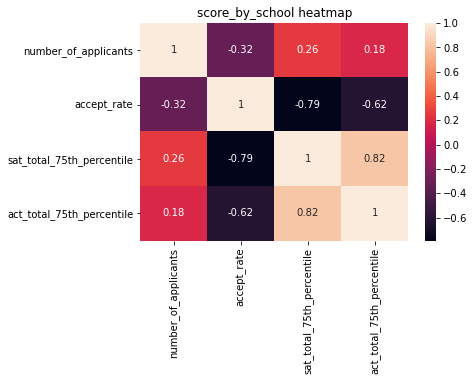

In [102]:
school_corr = score_by_school_df.corr()
plt.title('score_by_school heatmap')
sns.heatmap(school_corr, annot = True)

<AxesSubplot:title={'center':'intended_major heatmap'}>

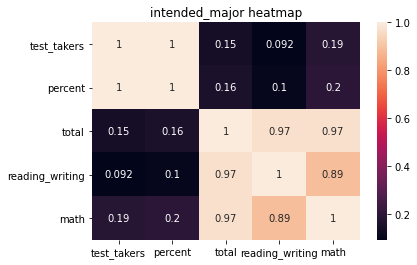

In [103]:
intended_corr = intended_major_df.corr()
plt.title('intended_major heatmap')
sns.heatmap(intended_corr, annot = True)

The plot below displays the distribution of SAT scores in the 75th percentile, across all schools in our data.

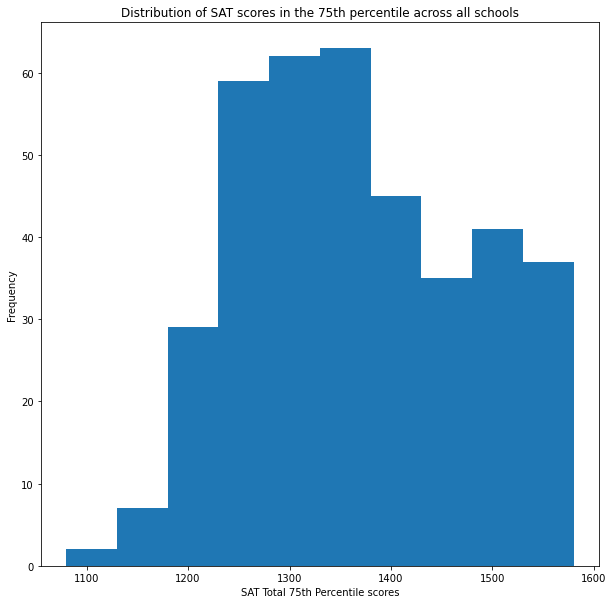

In [104]:
plt.figure(figsize = (10,10))
plt.hist(x=score_by_school_df['sat_total_75th_percentile'])
plt.title('Distribution of SAT scores in the 75th percentile across all schools')
plt.xlabel('SAT Total 75th Percentile scores')
plt.ylabel('Frequency')
plt.show;

A normal distribution for the most part, although there seems that scoring less that 1200 is incredibly unlikely to land you in the upper percentile at any school.

This histogram displays the distribution acceptance rates across schools.

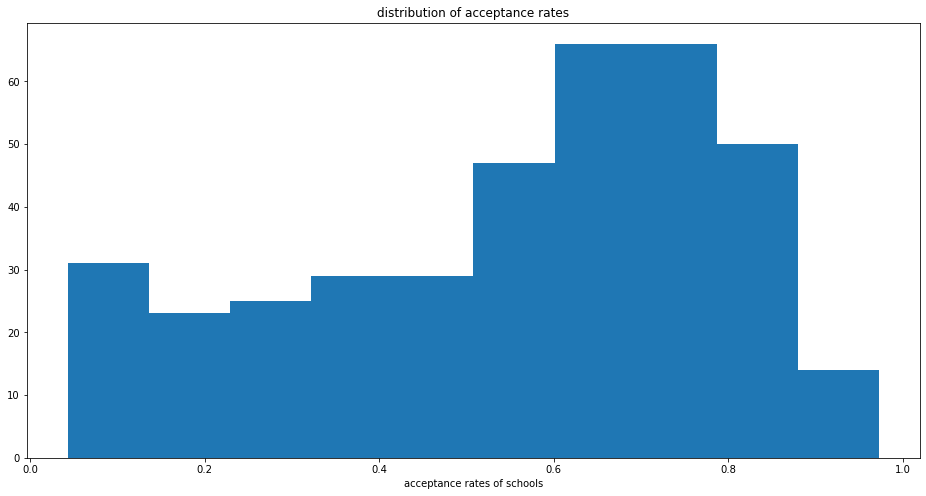

In [105]:
plt.figure(figsize = (16,8))
plt.title('distribution of acceptance rates')
plt.xlabel('acceptance rates of schools')
plt.hist(score_by_school_df['accept_rate']);

This seems normally distributed, except for the peak at the left.  I believe that speaks to the high number of 'prestigious' and competitive schools, such as Ivy League schools.  It's also worth noting that there are no results at either 0 or 1.  A school can't survive without students, but no school can afford to admit every single student who applies either!

Below is a box plot of total SAT scores from our Intended Mahor dataset.

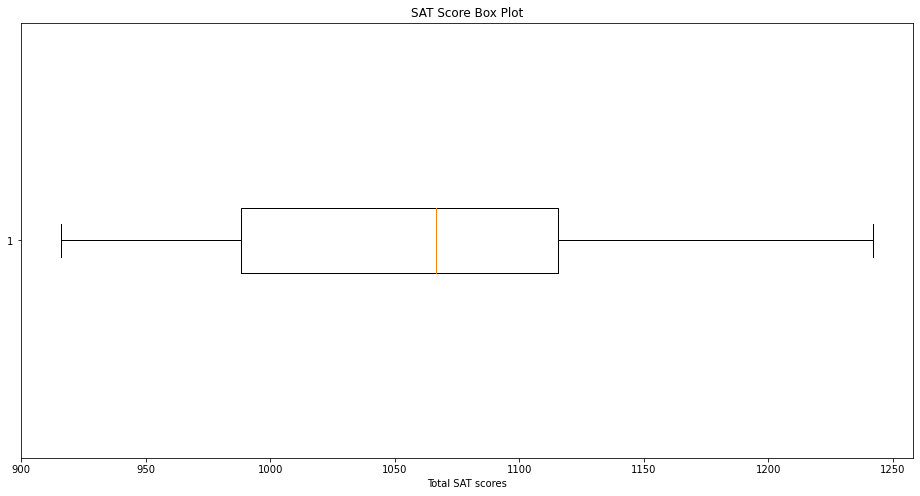

In [106]:
plt.figure(figsize=(16,8))
plt.title('SAT Score Box Plot')
plt.xlabel('Total SAT scores')
plt.boxplot(intended_major_df['total'], vert = False);

According to this boxplot, we can see that the highest score of the students sampled in this dataset is just under 1250 (high, but not Ivy League level), and the lowest is just above 900, which is unlikely to impress.  


Below is a box plot displaying the number of applicants each school in our Score by School dataset received.

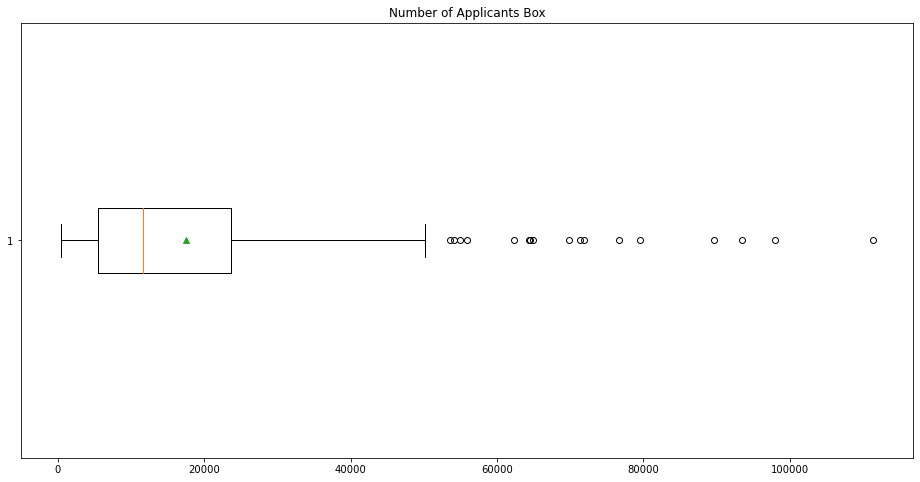

In [107]:
plt.figure(figsize=(16,8))
plt.title('Number of Applicants Box')
plt.boxplot(score_by_school_df['number_of_applicants'], showmeans = True, vert = False);

We can look at this and see the vast spread of how many students applied to the colleges in our 'score_by_school' dataset.  Those little dots to the right represent school far beyond the normal spread, in terms of applicant count. Those likely stand for the country's most popular schools, such as NYU, Harvard, UCLA, and so on. 

Below is a bar chart organizing the highest scoring fields of study in our Intended Major dataset.

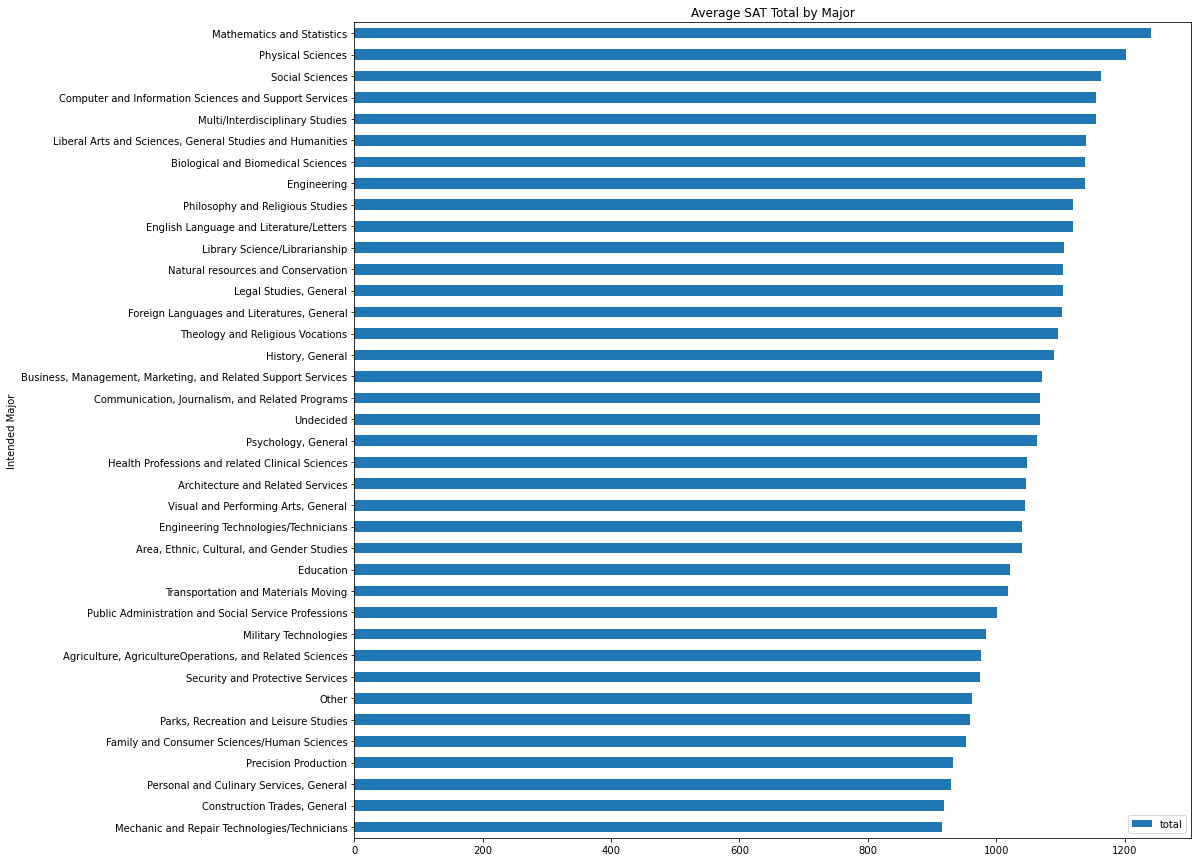

In [108]:
intended_major_df.sort_values('total').plot(x = 'intended_college_major', 
                                            y='total', 
                                            kind = 'barh', 
                                            title = 'Average SAT Total by Major', 
                                            xlabel = 'Intended Major', 
                                            ylabel = 'Average Total Score', 
                                            figsize = (15,15));

Using this bar chart, we can easily see which academic fields have higher average scores among those taking the test, and which are lower.  The highest here is Mathematics and Statistics, which is unsurprising given the academic pressure of that field.  On the other side, Construction Trades, General and Mechanic and Repair Technologies have the lowest averages.  This chart would be a useful tool for seeing what score would reach above a student's fellows when competing for acceptance and scholarships.

Below is a scatter plot explaining the relationship between each school's SAT 75th Percentile scores and the school's acceptance rate.

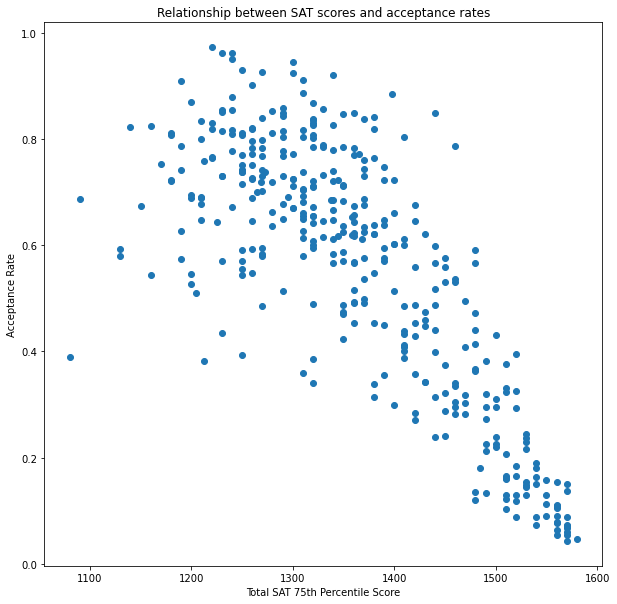

In [109]:
plt.figure(figsize = (10,10))
plt.title('Relationship between SAT scores and acceptance rates')
plt.xlabel('Total SAT 75th Percentile Score')
plt.ylabel('Acceptance Rate')
plt.scatter(score_by_school_df['sat_total_75th_percentile'], score_by_school_df['accept_rate']);

We can clearly see here that, as the scores increase, the acceptance rate decreases.  The schools with the ghighest average score are incredibly exclusive.

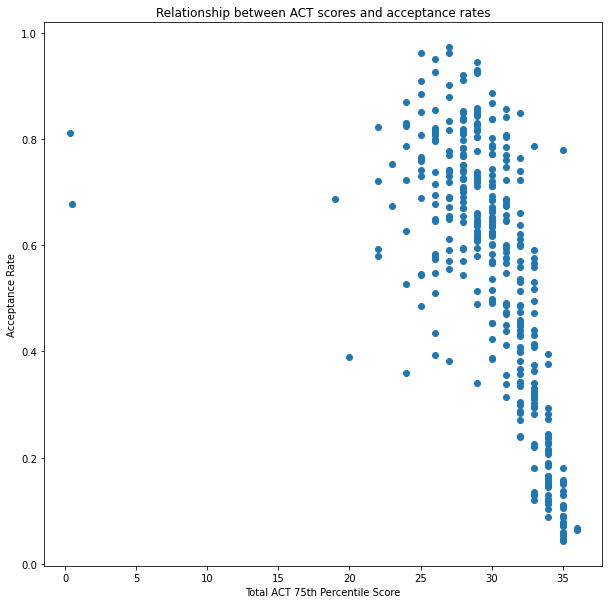

In [110]:
plt.figure(figsize = (10,10))
plt.title('Relationship between ACT scores and acceptance rates')
plt.xlabel('Total ACT 75th Percentile Score')
plt.ylabel('Acceptance Rate')
plt.scatter(score_by_school_df['act_total_75th_percentile'], score_by_school_df['accept_rate']);

The same can be said of the ACT scores as that of SAT scores.  The ACT chart isn't as clear, however, since the spread of possible scores is a couople orders of magnitude smaller.

BIBLIOGRAPHY:

    intended major dataset: https://reports.collegeboard.org/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf
    
    score by school dataset: https://www.compassprep.com/college-profiles/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

Ultimately, a higher score on these tests is always a preferable one.  Nonetheless, it can ease the pressure off students who know they are aiming for programs where the competition is looser.  If the student knows they want to enter a field or attend a school with a lower average score, they can focus on getting their scores just high enough to stand out, and then spend the rest of their energy elsewhile.  Students that want a field or school with a much higher average, however, must focus their energy on improving their score as much as possible so as to make themselves an exciting candidate.